# Data Exploration and Visualization Using Python

This Colab notebook provides an overview of various data exploration, analysis, and visualization techniques using popular Python libraries such as `pandas`, `seaborn`, `matplotlib`, and `scikit-learn`. It demonstrates how to load, process, and visualize data from different datasets to gain insights.

## Datasets Used

1. **California Housing Dataset:**
   - A dataset containing information about housing in California, including features like `MedInc`, `HouseAge`, and `AveRooms`, as well as the target variable `medianHouseValue`.

2. **Titanic Dataset:**
   - Data on passengers from the Titanic, including features like `age`, `sex`, `pclass`, and `fare`, and a target variable `survived`.

3. **Cars Dataset (Exercise):**
   - A dataset of car sales to practice tasks such as grouping, filtering, and calculating new metrics.

4. **Tips Dataset:**
   - A dataset from the `seaborn` package containing information about restaurant bills, tips, and various attributes (day, time, etc.).

5. **Air Quality Dataset:**
   - A dataset from the `pandas` documentation showing air quality measurements in different locations.

## Key Concepts Covered

### Data Loading and Exploration
- Using `pandas` and `scikit-learn` to load datasets.
- Viewing basic information, data types, and descriptive statistics of datasets.
- Checking for missing values, outliers, and basic data processing.

### Data Visualization
- **Boxplots** to identify outliers and data distribution.
- **Pairplots** to understand relationships between multiple variables.
- **Heatmaps** for visualizing correlation matrices.
- **Regplots** for fitting regression lines to data.
- **Histograms** to understand the distribution of data.
- **Relational plots** to analyze two continuous variables.

### Data Filtering, Grouping, and Aggregation
- Filtering data using conditions.
- Using `groupby` and `crosstab` to summarize data and perform calculations such as mean and standard deviation.
- Creating new features by applying calculations to existing columns.

### Machine Learning Integration
- Basic splitting of data into train and test sets using `scikit-learn`.

### Exercises
- Hands-on exercises with the Cars dataset to practice grouping, sorting, and creating new columns.

## Prerequisites
- Basic knowledge of Python programming.
- Familiarity with data analysis and visualization libraries (`pandas`, `seaborn`, `matplotlib`).
- Basic understanding of machine learning concepts.

## How to Use

1. **Open this Colab Notebook:**
   - If you're viewing this on GitHub or another platform, open this Colab instance.
2. **Run the Notebook:**
   - Each code block is self-contained, so you can run them sequentially.
   - Feel free to modify or add your own analysis.







Let's start by loading the California Housing Dataset

In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
type(california_housing)

sklearn.utils._bunch.Bunch

In [ ]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
df = california_housing.data
type(df)

pandas.core.frame.DataFrame

In [ ]:
df['medianHouseValue'] = california_housing.target

In [ ]:
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,medianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='medianHouseValue'>

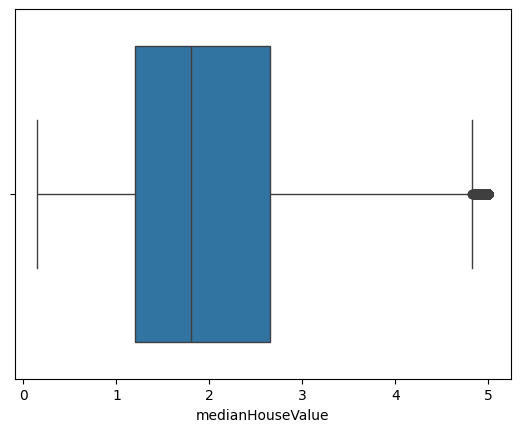

In [ ]:
sns.boxplot(x="medianHouseValue", data=df)

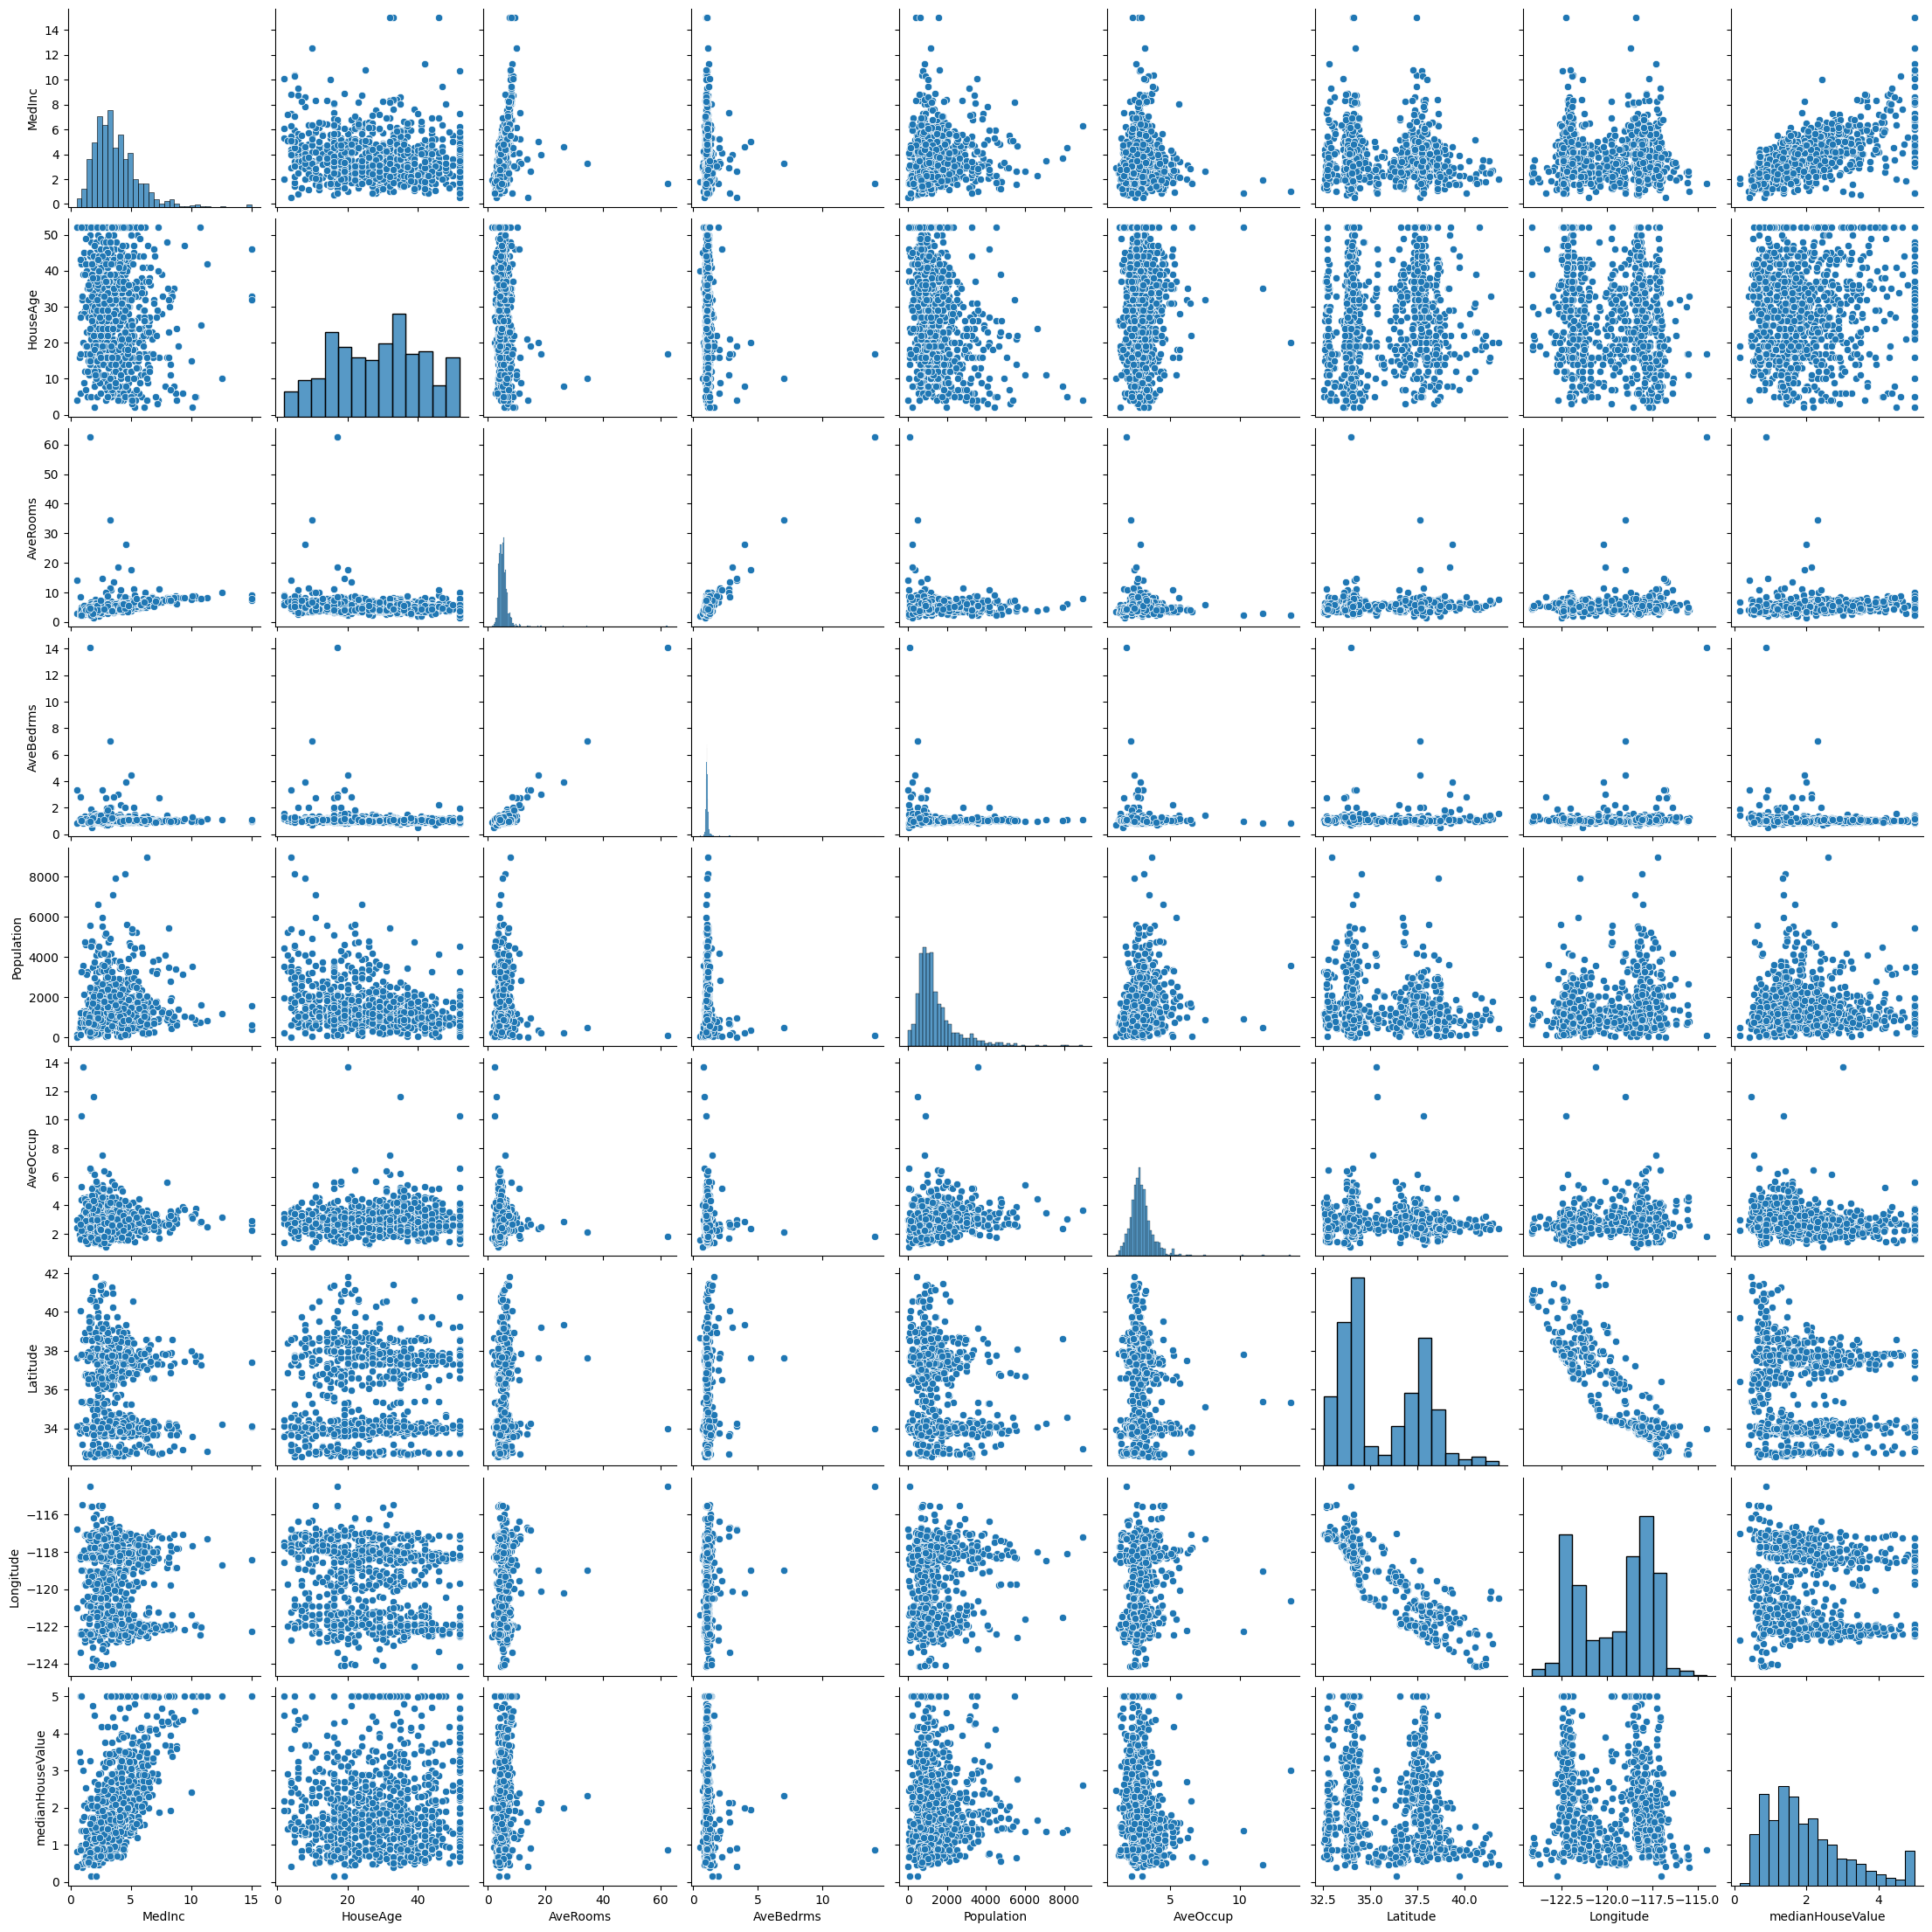

In [ ]:
sns.pairplot(df.sample(1000))

Let's take a smaller sample of data.

In [ ]:
M=df.corr()
M

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,medianHouseValue
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
medianHouseValue,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


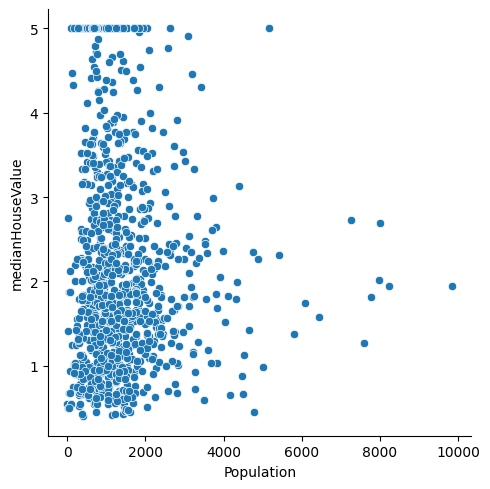

In [ ]:
sns.relplot(data=df.sample(1000), x="Population", y="medianHouseValue")

In [ ]:
M = df.corr()

In [ ]:
M

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,medianHouseValue
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
medianHouseValue,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

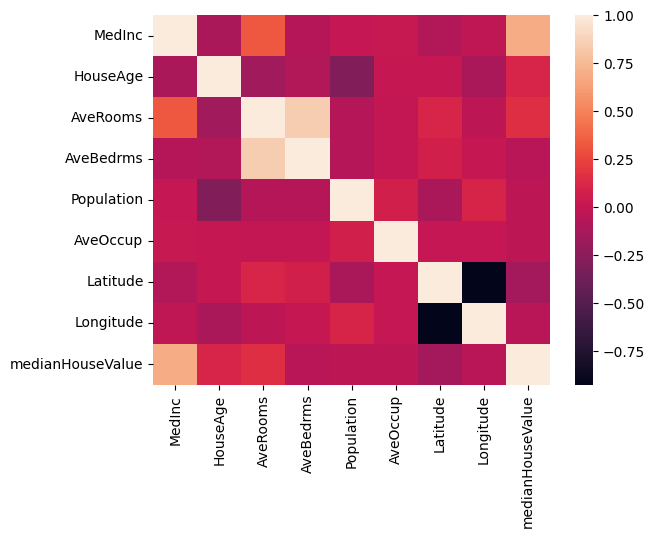

In [ ]:
sns.heatmap(M)

# Titanic Dataset
Let's play with another dataset - the Titanic survival dataset.

In [ ]:
import pandas as pd
titanic = pd.read_csv("https://an-vistra.s3.us-west-1.amazonaws.com/data/titanic.csv")


In [ ]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Find out the data type of each column

In [ ]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
# The following would also work
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [ ]:
# For categorical columns, we can find out the count of each distinct value easily
titanic['home.dest'].value_counts()

home.dest
New York, NY                                    64
London                                          14
Montreal, PQ                                    10
Paris, France                                    9
Cornwall / Akron, OH                             9
                                                ..
Chelsea, London                                  1
Harrow-on-the-Hill, Middlesex                    1
Copenhagen, Denmark                              1
Guernsey / Montclair, NJ and/or Toledo, Ohio     1
Antwerp, Belgium / Stanton, OH                   1
Name: count, Length: 369, dtype: int64

In [ ]:
# Try to find the value count of other categorical variables

# Filtering Data from a Dataframe

In [ ]:
# filter data to find passengers whose age was less than 25 and in 1st class
titanic[(titanic["age"]<25) & (titanic["pclass"]==1)]


Series([], Name: count, dtype: int64)

Crosstab can provide valuable information

In [ ]:
# Create a crosstab between pclass, sex with count of survived as value
pd.crosstab(titanic['pclass'], titanic['sex'], values=titanic['age'], aggfunc="mean")

sex,female,male
pclass,,
1,37.037594,41.029272
2,27.499223,30.815380
3,22.185329,25.962264


Grouping and Aggregation

In [ ]:
# Find the average and standard deviation of age  grouped by sex
titanic.groupby(["sex","pclass",'survived'])['fare'].agg(['mean', 'std'])

mean        std
sex    pclass survived                       
female 1      0         117.054180  84.321398
              1         109.137500  83.130611
       2      0          19.125000   6.208956
              1          23.759486  11.645476
       3      0          18.367162  14.958090
              1          12.166510   5.694249
male   1      0          68.436192  62.925670
              1          72.697546  92.449397
       2      0          19.857334  15.533788
              1          20.183000   9.401452
       3      0          12.134521  10.786874
              1          13.977496  13.581856

# Exercise

In this task, you will do the following after reading in a cars dataset from https://an-utd-python.s3.us-west-1.amazonaws.com/Car_sales.csv


**Run the following queries on the cars dataset that you loaded above:**


Give a breakdown of count of models grouped by manufacturer. Sort your answer in decreasing order of count of models

Find the most expensive car for each manufacturer

Find average fuel_efficiency for each vehicle_type

Using the columns Price_in_thousands and Sales_in_thousands, create a new column called Total_Revenue_in_thousands

# Data Visualization

Let's work with the *tips* dataset imported from the *seaborn* package in Python

In [ ]:
import seaborn as sns
tips = sns.load_dataset("tips")

In [ ]:
tips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<Axes: xlabel='total_bill'>

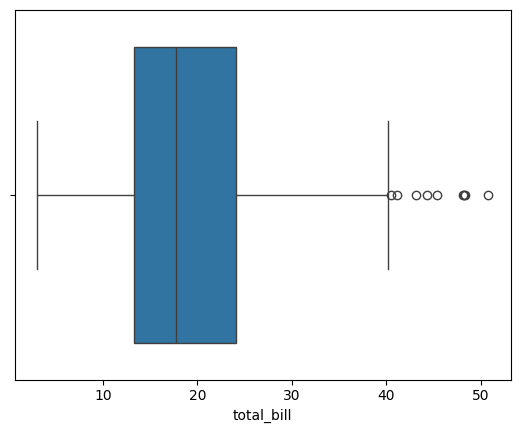

In [ ]:
# Create a histogram for tip amount and total bill
sns.boxplot(x="total_bill", data=tips)

<Axes: xlabel='total_bill'>

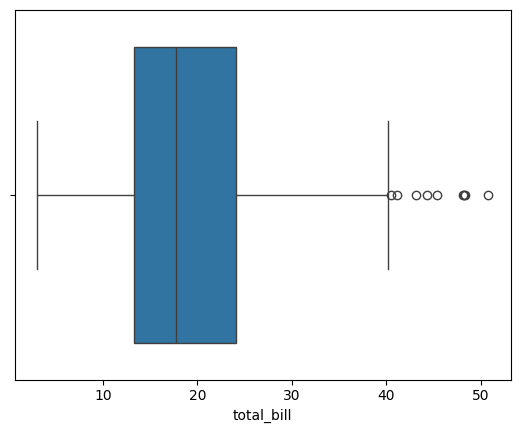

In [ ]:
# Create a box and whisker plot for total_bill amount
sns.boxplot(x="total_bill", data=tips)

What information does the above plot convey to you? What does the box indicate and what do the whiskers indicate? What can you say about the values that fall outside the whiskers?

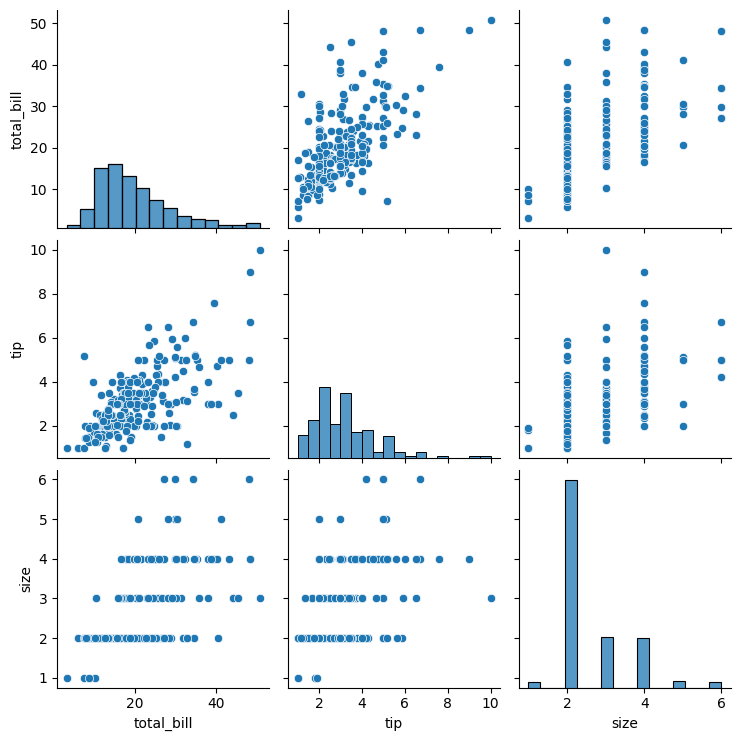

In [ ]:
sns.pairplot(tips)

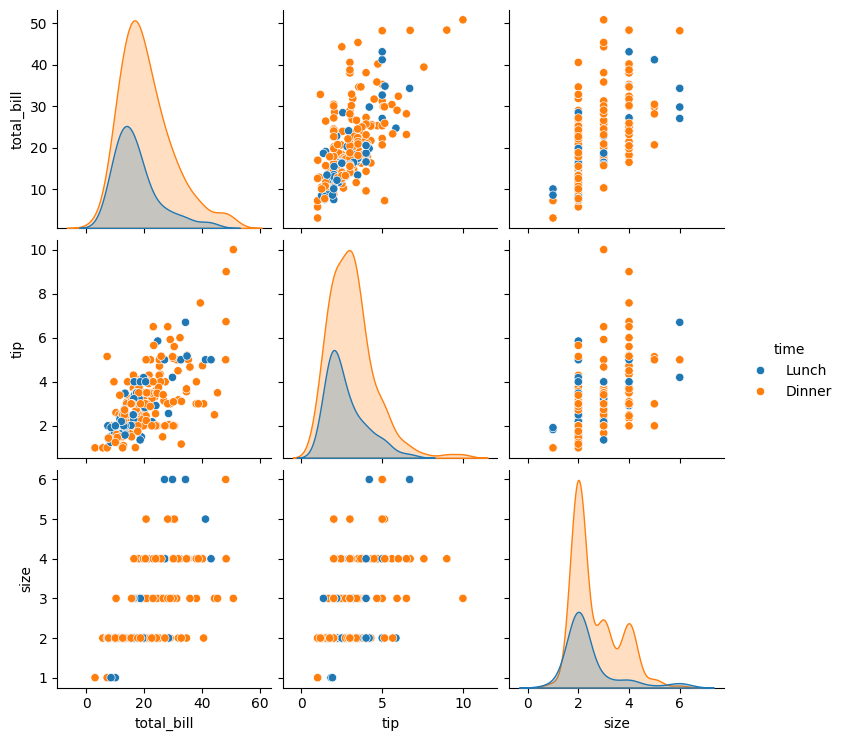

In [ ]:
# Let's color it with hue = time
sns.pairplot(tips, hue="time")


Let's create a column called pct_tips which computes the tip as a percent of the total_bill

In [ ]:
tips["pct_tip"] = (tips["tip"]/tips["total_bill"]) * 100

In [ ]:
import pandas as pd
a=tips["pct_tip"]=(tips["tip"]/tips["total_bill"])*100
print(tips.head())
print(pd.crosstab(tips["day"],tips["size"], values=tips["pct_tip"],aggfunc="mean"))
sns.get_dataset_names()
print(a.head())

   total_bill   tip     sex smoker  day    time  size    pct_tip
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765
size          1          2          3          4          5          6
day                                                                   
Thur  18.172790  16.393508  14.459879  14.551515  12.138869  17.370592
Fri   22.377622  16.869294  18.773467  11.774956        NaN        NaN
Sat   23.183197  15.528884  15.143861  13.828925  10.657194        NaN
Sun         NaN  18.086960  15.266238  15.316820  15.983894  10.379905
0     5.944673
1    16.054159
2    16.658734
3    13.978041
4    14.680765
dtype: float64


In [ ]:
tips.groupby(["day","time"])["pct_tip"].mean().sort_values(ascending=False)
sns.get_dataset_names()
a=sns.load_dataset("penguins")
a.info()
a.head()
a.corr(numeric_only=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


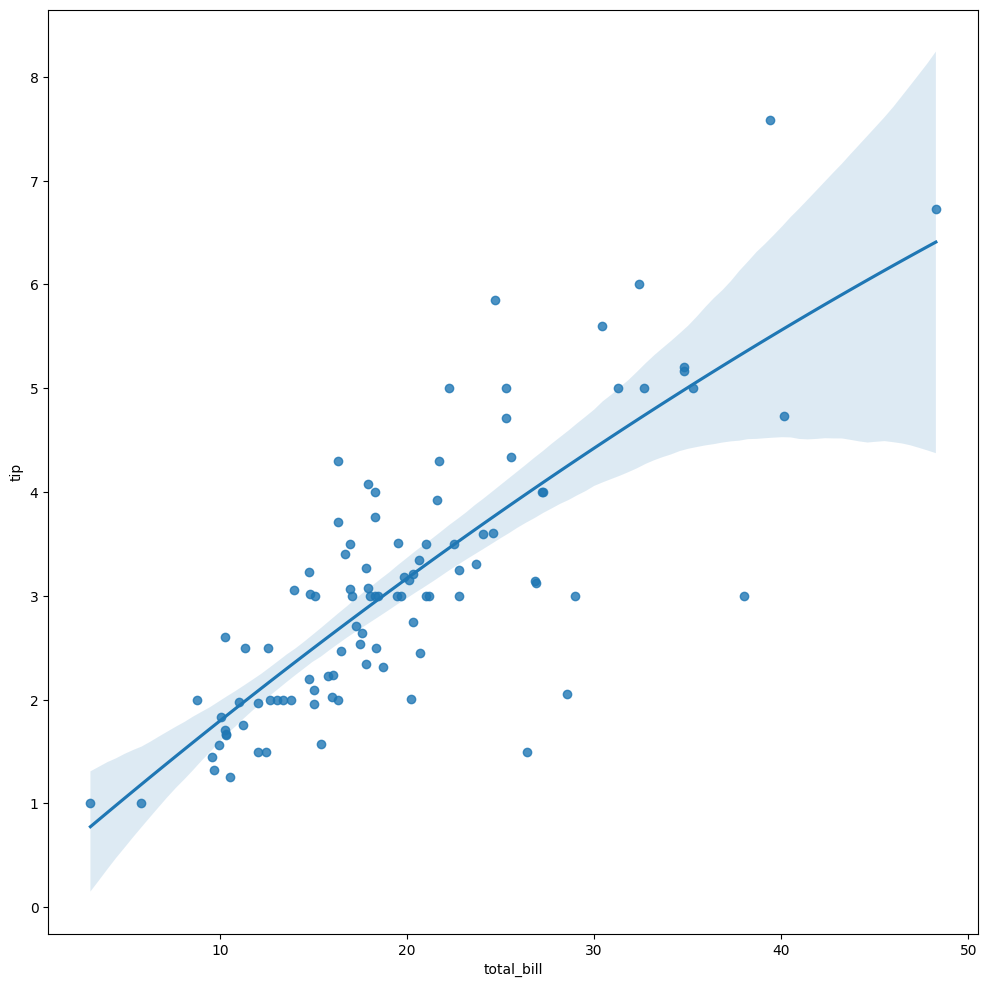

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
sns.regplot(x="total_bill", y="tip", data=tips.loc[1:100,:], order = 2);

In [ ]:
air_quality = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2_long.csv", index_col=0, parse_dates=True)
air_quality
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2068 entries, Paris to London
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   country    2068 non-null   object             
 1   datetime   2068 non-null   datetime64[ns, UTC]
 2   location   2068 non-null   object             
 3   parameter  2068 non-null   object             
 4   value      2068 non-null   float64            
 5   unit       2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 113.1+ KB


<ipython-input-77-ccf453d85288>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  air_quality = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2_long.csv", index_col=0, parse_dates=True)


In [ ]:
from sklearn.model_selection import train_test_split
train_test_split(tips,test_size=0.2,random_state=42)

[     total_bill   tip     sex smoker   day    time  size    pct_tip
 228       13.28  2.72    Male     No   Sat  Dinner     2  20.481928
 208       24.27  2.03    Male    Yes   Sat  Dinner     2   8.364236
 96        27.28  4.00    Male    Yes   Fri  Dinner     2  14.662757
 167       31.71  4.50    Male     No   Sun  Dinner     4  14.191107
 84        15.98  2.03    Male     No  Thur   Lunch     2  12.703379
 ..          ...   ...     ...    ...   ...     ...   ...        ...
 106       20.49  4.06    Male    Yes   Sat  Dinner     2  19.814544
 14        14.83  3.02  Female     No   Sun  Dinner     2  20.364127
 92         5.75  1.00  Female    Yes   Fri  Dinner     2  17.391304
 179       34.63  3.55    Male    Yes   Sun  Dinner     2  10.251227
 102       44.30  2.50  Female    Yes   Sat  Dinner     3   5.643341
 
 [195 rows x 8 columns],
      total_bill   tip     sex smoker   day    time  size    pct_tip
 24        19.82  3.18    Male     No   Sat  Dinner     2  16.044400
 6     

<Axes: ylabel='Count'>

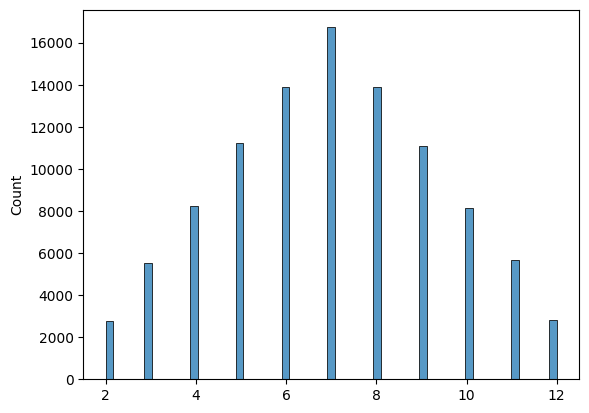

In [ ]:
import numpy as np
import seaborn as sb
d1=np.random.randint(1,7,100000)
d2=np.random.randint(1,7,100000)
summ=d1+d2
sb.histplot(data=summ)